In [172]:
import pandas as pd

import wandb
import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import os
import numpy as np
import seaborn as sbs
import pandas as pd
import matplotlib.pyplot as plt

In "Validation of synthetic data" the case were the training_data was completely confounded was tested to show that neural networks indeed fit to confounding factors in images. Now the hypothesis is that if we have a small set of unconfounded data we can either use a confounder-free neural network or a DANN to unlearn the confounders. For establishing a performance baseline we need to test the SimpleConv on a dataset consisting of the confounded set and the small unconfounded set, otherwise the conditions would not be equal for the different networks.

In this case there are 512 samples from the source domain (with correlating confounders) and a varying number of samples (16 or 64) from the target domain (with no confounders).

In [173]:
#model = Models.BrNet()
batch_date = "Thu Sep 29 15:20:59 CEST 2022" # small validation set (8 samples)
#batch_date = "Thu Sep 29 18:46:13 CEST 2022" # non-overlapping features
#batch_date = "Fri Sep 30 10:27:54 CEST 2022" # test-data drawn from source domain broken
#batch_date = "Fri Sep 30 17:20:05 CEST 2022" # fixed alpha and source domain as validation
#batch_date = "Tue Oct  4 11:16:19 CEST 2022" # fixed alpha+weight decay and target domain as validation
batch_date = "Tue Oct  4 19:02:55 CEST 2022" # fixed alpha and target domain as validation
#batch_date = "Wed Oct  5 09:54:26 CEST 2022"
batch_date = "Tue Nov 15 13:53:26 CET 2022" # fixed alpha and target domain as validation, 2k epochs
batch_date ="Tue Nov 15 21:28:23 CET 2022" # fixed alpha and target domain as validation, 10k epochs

# error fixed
batch_date = "Thu Nov 17 17:19:48 CET 2022" # fixed alpha and target domain (8 samples val), 2k
batch_date = "Thu Nov 17 21:30:26 CET 2022" # fixed alpha and target domain (8 samples val), 10k
batch_date = "Fri Nov 18 13:00:12 CET 2022" # dynamic alpha and target domain (8 samples val), 10k
batch_date = "Fri Nov 18 16:45:42 CET 2022" # dynamic alpha and target domain (4 samples val, low samples), 10k

filters = {
    "config.batch_date": batch_date,
    # "config.target_domain_samples": 0,
    # "summary_metrics.confounder_strength": 0,
    # "config.target_domain_confounding":0,
}
importlib.reload(CI)
#CI.wandb_sync.get_best_runs(project="Hyperparameters", filters=filters, force_reload=True)

<module 'Framework.Confounder_Injection' from '/home/raffi/Bachelor Arbeit/Jupyter/Confounder_Injection/Framework/Confounder_Injection.py'>

In [174]:
importlib.reload(CI)
table = CI.helper.BrNet_on_BrNet_data_all(batch_date=batch_date, force_reload=False, legacy=True)

Experiment 1.
no-confounder
0/512
- summary_metrics.confounder_strength=0
- config.target_domain_samples=0
- config.target_domain_confounding=0
- config.de_correlate_confounder_target=0
- config.batch_date=Thu Nov 17 21:30:26 CET 2022
- config.finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... Skipped run: 8595117818875766427  ...  done (0.828s)
Runs synced, models re-created and tested (took 4.828s)

Experiment 2.
no-confounder
8/512
- summary_metrics.confounder_strength=0
- config.target_domain_samples=8
- config.target_domain_confounding=0
- config.de_correlate_confounder_target=0
- config.batch_date=Thu Nov 17 21:30:26 CET 2022
- config.finetuning=0
Searching for best runs ... done (0.001s)
Re-creating models ... Skipped run: 6921779499856680273  ...  Skipped run: 4400666087736321651  ...  Skipped run: 816043372290789393  ...  Skipped run: 2151375903884472815  ...  Skipped run: 4243337474595160329  ...  Skipped run: 3100566718484032149  ...  done (4.195s)

In [175]:
table

,model,classification_accuracy,classification_accuracy_val,confounder_accuracy,random,experiment,summary_metrics.confounder_strength,config.target_domain_samples,config.target_domain_confounding,config.de_correlate_confounder_target,config.batch_date,config.finetuning
0,BrNet_CF-net_labels_entropy,0.835938,1.0000,0.000000,7908046166913857219,1.\nno-confounder\n0/512,0,0,0,0,Thu Nov 17 21:30:26 CET 2022,0
1,BrNet_CF-net_labels_entropy,0.760742,0.9375,0.000000,7725846017463872385,1.\nno-confounder\n0/512,0,0,0,0,Thu Nov 17 21:30:26 CET 2022,0
2,BrNet_CF-net_labels_entropy,0.824219,0.9375,0.000000,5825748297548734266,1.\nno-confounder\n0/512,0,0,0,0,Thu Nov 17 21:30:26 CET 2022,0
3,BrNet_CF-net_labels_entropy,0.791016,0.8750,0.000000,1080151292845365094,1.\nno-confounder\n0/512,0,0,0,0,Thu Nov 17 21:30:26 CET 2022,0
4,BrNet_CF-net_labels_entropy,0.718750,0.8750,0.000000,1879919858942834901,1.\nno-confounder\n0/512,0,0,0,0,Thu Nov 17 21:30:26 CET 2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1357,BrNet_DANN_entropy,0.856445,0.8750,0.594727,1734764926929430756,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Nov 17 21:30:26 CET 2022,1
1358,BrNet_DANN_entropy,0.860352,0.8125,0.541992,4276820516916819893,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Nov 17 21:30:26 CET 2022,1
1359,BrNet_DANN_entropy,0.867188,0.8125,0.544922,9166575609430026274,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Nov 17 21:30:26 CET 2022,1
1360,BrNet_DANN_entropy,0.863281,0.8125,0.564453,6675111613111626118,4.\nde-correlated\n64/512\nfinetuning,1,64,1,1,Thu Nov 17 21:30:26 CET 2022,1


api = wandb.Api()
run = api.run("confounder_in_ml/Hyperparameters/12fn5hxk")
run.delete()

In [176]:
def filter(df, reverse=False):
    if not reverse:
        df = df[(df["model"]=="BrNet_DANN_entropy")|(df["model"]=="BrNet")|(df["model"]=="BrNet_DANN_corr")|(df["model"]=="BrNet_CF_free_features_corr_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_labels_entropy")|(df["model"]=="BrNet_DANN_entropy_conditioned_0.0")|(df["model"]=="BrNet_CF_free_features_corr")|(df["model"]=="BrNet_CF_free_labels_corr")]
    else:
        df = df[(df["model"]!="BrNet_DANN_entropy")&(df["model"]!="BrNet")&(df["model"]!="BrNet_DANN_corr")&(df["model"]!="BrNet_CF_free_features_corr_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_labels_entropy")&(df["model"]!="BrNet_DANN_entropy_conditioned_0.0")&(df["model"]!="BrNet_CF_free_features_corr")&(df["model"]!="BrNet_CF_free_labels_corr")]
    return df

fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==0], ax=ax, num=1, agg_func=np.mean, mean=True, accuracy="classification_accuracy_val")
ax.set_xlabel("experiments")

Text(0.5, 27.799999999999997, 'experiments')

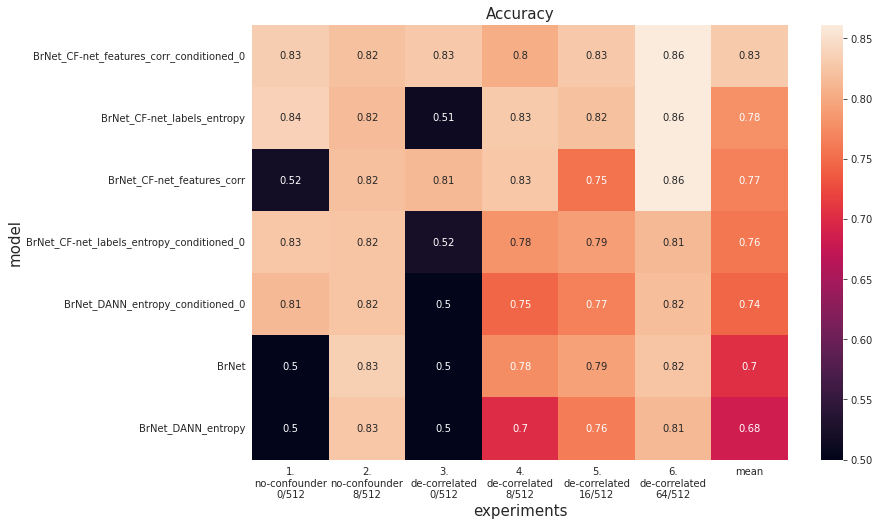

In [177]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==0], ax=ax, num=1, agg_func=np.mean, mean=True)
ax.set_xlabel("experiments")

Text(0.5, 27.799999999999997, 'experiments')

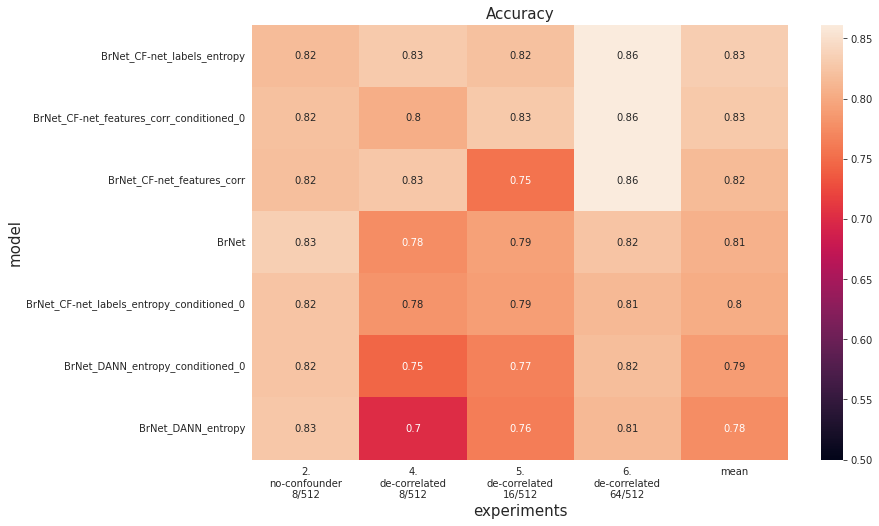

In [189]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_samples"]!=0)], ax=ax, num=1, agg_func=np.mean, mean=True)
ax.set_xlabel("experiments")

Text(0.5, 27.799999999999997, 'experiments')

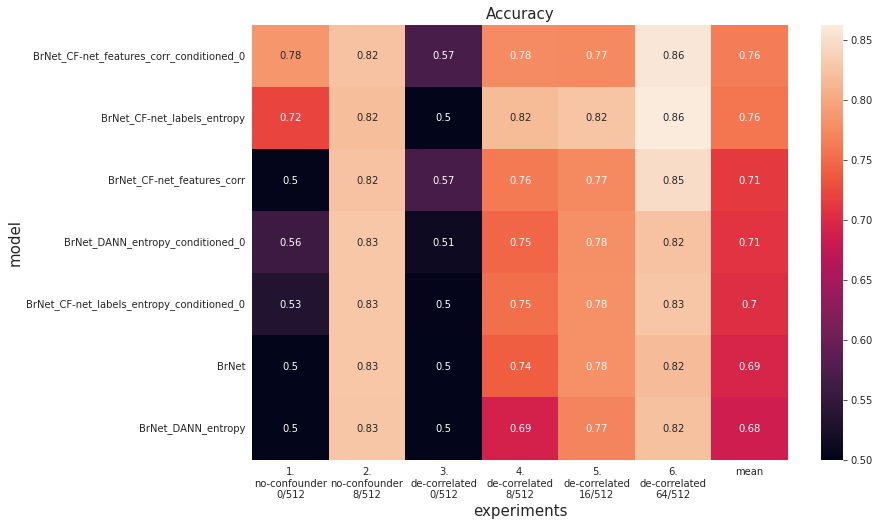

In [185]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==0], ax=ax, num=10, agg_func=np.mean, mean=True)
ax.set_xlabel("experiments")

Text(0.5, 27.799999999999997, 'experiments')

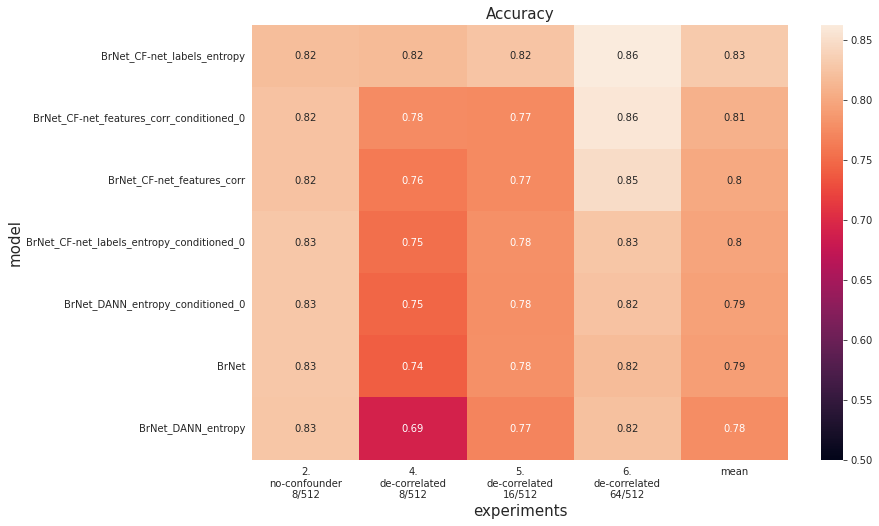

In [190]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[(table["config.finetuning"]==0) & (table["config.target_domain_samples"]!=0)], ax=ax, num=10, agg_func=np.mean, mean=True)
ax.set_xlabel("experiments")

Text(0.5, 27.799999999999997, 'experiments')

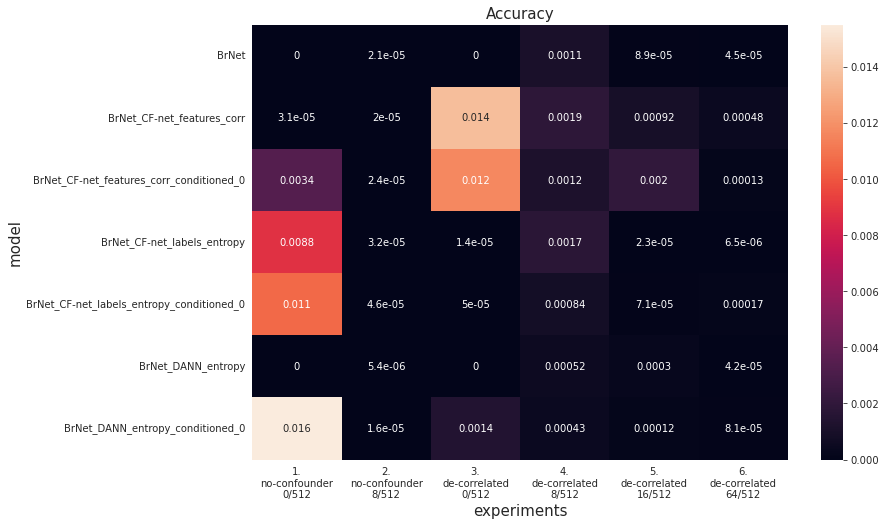

In [180]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==0], ax=ax, num=10, agg_func=np.var, mean=False)
ax.set_xlabel("experiments")

In [181]:
table.pivot_table(index="model", columns="experiment", values="classification_accuracy")

experiment,1.\nno-confounder\n0/512,1.\nno-confounder\n8/512\nfinetuning,2.\nde-correlated\n8/512\nfinetuning,2.\nno-confounder\n8/512,3.\nde-correlated\n0/512,3.\nde-correlated\n16/512\nfinetuning,4.\nde-correlated\n64/512\nfinetuning,4.\nde-correlated\n8/512,5.\nde-correlated\n16/512,6.\nde-correlated\n64/512
model,,,,,,,,,,
BrNet,0.500000,0.819336,0.830176,0.826009,0.500000,0.827344,0.851172,0.737870,0.778886,0.820850
BrNet_CF-net_features_corr,0.500925,0.823139,0.827930,0.820569,0.535876,0.829980,0.846731,0.744727,0.771143,0.844037
BrNet_CF-net_features_corr_conditioned_0,0.683594,0.824707,0.828516,0.821094,0.534863,0.827051,0.853361,0.778711,0.772168,0.851611
BrNet_CF-net_labels_entropy,0.611572,0.822368,0.806250,0.820775,0.500586,0.816211,0.830713,0.821018,0.825606,0.863487
BrNet_CF-net_labels_entropy_conditioned_0,0.516309,0.821700,0.828125,0.823653,0.507967,0.790636,0.856201,0.731445,0.771896,0.825658
BrNet_DANN_entropy,0.500000,0.822009,0.830078,0.828174,0.500000,0.831787,0.853464,0.686963,0.772821,0.820703
BrNet_DANN_entropy_conditioned_0,0.529443,0.825977,0.827046,0.825350,0.506219,0.829443,0.839795,0.730366,0.779590,0.824527


Text(0.5, 16.199999999999996, 'experiments')

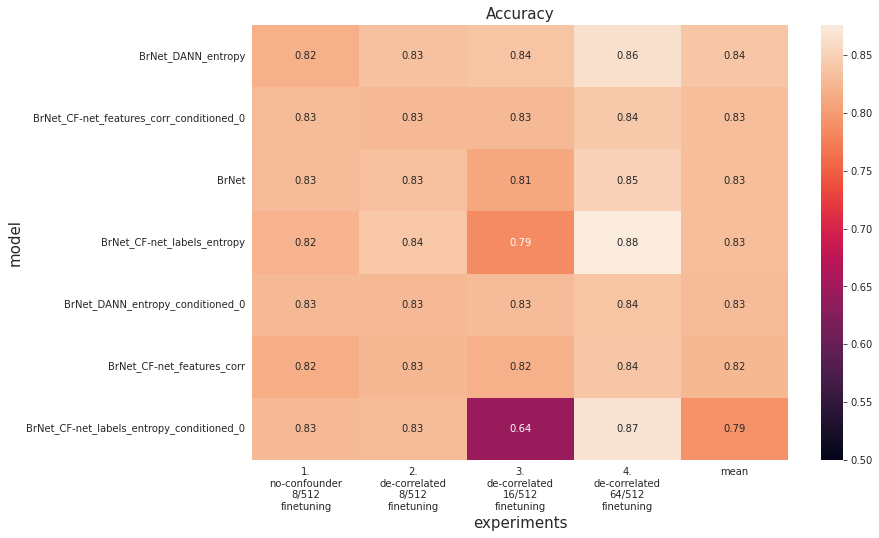

In [182]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.set_title("Accuracy")
CI.plot.plot_heatmap_with_mean(table[table["config.finetuning"]==1], ax=ax, num=1, agg_func=np.mean, mean=True)
ax.set_xlabel("experiments")

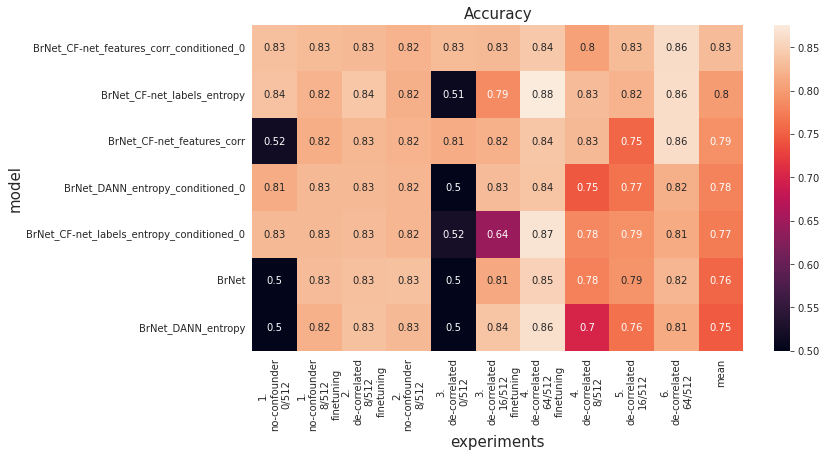

In [183]:
importlib.reload(CI)
# CI.plot.split_and_plot_heatmaps_with_mean(table)
fig, ax = plt.subplots(1,1,figsize=(11,6))
ax.set_title("Accuracy")
df = table
#df = CI.plot.filter(table, filter_unrealistic=True)
CI.plot.plot_heatmap_with_mean(df, ax=ax)
ax.set_xlabel("experiments")
pass

# No confounders in target data

### With 0 training-samples from target population

CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=0)

### With 16 training-samples from target population

The accuracy with more samples is the same but the network converges faster.

CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=0)

config_filter = {"confounder_strength":1, "target_domain_samples":16, "de_correlate_confounder_target": False, "batch_date": date, "target_domain_confounding":0}
p.accuracy_vs_epoch(file, config_filter, groupby="model")

# De-correlated confounders in target- and test-data

### With 0 training-samples from target population


CI.plot.split_and_plot_heatmaps(table, target_domain_samples=0, de_correlate_confounder_target=1)

### With 16 training-samples from target population

CI.plot.split_and_plot_heatmaps(table, target_domain_samples=16, de_correlate_confounder_target=1)

### With 64 training-samples from target population

CI.plot.split_and_plot_heatmaps(table, target_domain_samples=64, de_correlate_confounder_target=1)